
# Building Machine Learning Datasets From Scratch

All machine learning problems begin with a dataset, and before we can perform any kind of inference on that dataset we must create/wrangle/build it. This is often the most time-consuming and hard part of a successful machine learning workflow. There is no set procedure here, as all data is different, although there are a few simple methods we can take to make a useful dataset.

We will be using data from a submitted Manuscript (Butterworth and Barnett-Moore 2020) which was a finalist in the [Unearthed, ExploreSA: Gawler Challenge](https://unearthed.solutions/u/competitions/exploresa). You can visit the [original repo here](https://github.com/natbutter/gawler-exploration).

<br>

# Goal: Create a table of data containing "targets" and "predictor variables"

The targets in an ML context can be a simple binary 1 or 0, or could be some category (classification), or the value of a particular parameter (regression problems). It is the "feature" of a dataset that we want to learn something about!

The "predictor/feature variables" are the quatities/parameters that may have some causal relationship with the the target.


## Step 1 - What is our target variable?
Are we classifying something? 

### Deposit locations - mine and mineral occurances
The most important dataset for this workflow is the currently known locations of mineral occurences. Using the data we already know about these known-deposits we will build a model to predict where future occurences will be.

In [1]:
# For working with shapefiles (packaged is called pyshp)
import shapefile
# For working with dataframes
import pandas as pd

In [2]:
# Set the filename
mineshape="data/MinesMinerals/mines_and_mineral_occurrences_all.shp"

# Set shapefile attributes and assign
sf = shapefile.Reader(mineshape)
fields = [x[0] for x in sf.fields][1:]
records = sf.records()
shps = [s.points for s in sf.shapes()]

# Write into a dataframe for easy use
df = pd.DataFrame(columns=fields, data=records)

View the metadata of the [South Australian all mines and mineral deposits](https://catalog.sarig.sa.gov.au/geonetwork/srv/eng/catalog.search#/metadata/a0e4b62c-ec88-44b8-a530-b4e744a6b414) to get a better understanding for what features we could use as a target.

In [3]:
#See what the dataframe looks like
print(df.columns)

#For clean printing to html drop columns that contains annoying / and \ chars.
#And set max columns
pd.options.display.max_columns = 8
df.drop(columns=['REFERENCE','O_MAP_SYMB'])

Index(['MINDEP_NO', 'DEP_NAME', 'REFERENCE', 'COMM_CODE', 'COMMODS',
       'COMMOD_MAJ', 'COMM_SPECS', 'GCHEM_ASSC', 'DISC_YEAR', 'CLASS_CODE',
       'OPER_TYPE', 'MAP_SYMB', 'STATUS_VAL', 'SIZE_VAL', 'GEOL_PROV',
       'DB_RES_RVE', 'DB_PROD', 'DB_DOC_IMG', 'DB_EXV_IMG', 'DB_DEP_IMG',
       'DB_DEP_FLE', 'COX_CLASS', 'REG_O_CTRL', 'LOC_O_CTRL', 'LOC_O_COM',
       'O_LITH_CDE', 'O_LITH01', 'O_STRAT_NM', 'H_LITH_CDE', 'H_LITH02',
       'H_STRAT_NM', 'H_MAP_SYMB', 'EASTING', 'NORTHING', 'ZONE', 'LONGITUDE',
       'LATITUDE', 'SVY_METHOD', 'HORZ_ACC', 'SRCE_MAP', 'SRCE_CNTRE',
       'COMMENTS', 'O_MAP_SYMB'],
      dtype='object')


,MINDEP_NO,DEP_NAME,COMM_CODE,COMMODS,...,HORZ_ACC,SRCE_MAP,SRCE_CNTRE,COMMENTS
0,5219,MOUNT DAVIES NO.2A,Ni,Nickel,...,2000.0,500k meis,,
1,52,ONE STONE,Ni,Nickel,...,500.0,71-385,,
2,8314,HINCKLEY RANGE,Fe,Iron,...,500.0,,,
3,69,KALKA,"V, ILM","Vanadium, Ilmenite",...,100.0,1 MILE,mgt polygon on digital map,
4,65,ECHIDNA,Ni,Nickel,...,20.0,50K GEOL,DH ECHIDNA PROSPECT,
...,...,...,...,...,...,...,...,...,...
8672,6937,YARINGA,QTZE,Quartzite,...,200.0,50k moc,fenced yard,
8673,4729,WELCHS,SCHT,Schist,...,20.0,50k topo,,
8674,4718,ARCADIAN,CLAY,Clay,...,5.0,Plan 1951-0327,Pit,
8675,1436,MCDONALD,Au,Gold,...,200.0,50k moc,qz float,


In [4]:
#We are building a model to target South Australia, so load in a map of it.
gawlshape="data/SA/SA_STATE_POLYGON_shp"
shapeRead = shapefile.Reader(gawlshape)
shapes  = shapeRead.shapes()

#Save the boundary xy pairs in arrays we will use throughout the workflow
xval = [x[0] for x in shapes[1].points]
yval = [x[1] for x in shapes[1].points]

In [5]:
# Subset the data, for a single Mineral target
commname='Cu'

#Pull out all the occurences of the commodity and go from there
comm=df[df['COMM_CODE'].str.contains(commname)]
comm=comm.reset_index(drop=True)
print("Shape of "+ commname, comm.shape)

# Can make further subsets of the data here if needed
#commsig=comm[comm.SIZE_VAL!="Low Significance"]
#comm=comm[comm.SIZE_VAL!="Low Significance"]
#comm=comm[comm.COX_CLASS == "Olympic Dam Cu-U-Au"]
#comm=comm[(comm.lon<max(xval)) & (comm.lon>min(xval)) & (comm.lat>min(yval)) & (comm.lat<max(yval))]


Shape of Cu (1569, 43)


In [6]:
# For plotting
import matplotlib.pyplot as plt

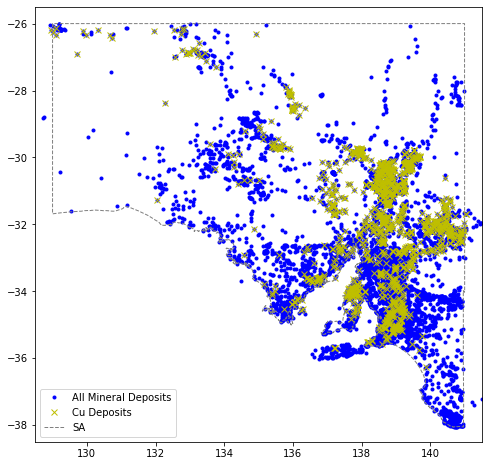

In [7]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.plot(df.LONGITUDE,df.LATITUDE,'b.',label="All Mineral Deposits")
ax.plot(comm.LONGITUDE,comm.LATITUDE,'yx',label=commname+" Deposits")

ax.plot(xval,yval,'grey',linestyle='--',linewidth=1,label='SA')
#ax.plot(comm.LONGITUDE, comm.LATITUDE, marker='o', linestyle='',markersize=5, color='y',label=commname+" Deposits")

plt.xlim(128.5,141.5)
plt.ylim(-38.5,-25.5)
plt.legend(loc=3)

plt.show()

## Step 2 - Wrangle the geophysical and geological datasets (variable features)
Each geophysical dataset could offer instight into various commodities. Here we load in the pre-processed datasets and prepare them for further manipulations, data-mining, and machine learning.
All of the full datasets are availble from https://map.sarig.sa.gov.au/. For this exercise we have simplified the datasets (reduced complexity and resolution). Grab full datasets from [https://github.com/natbutter/gawler-exploration/tree/master/ML-DATA](https://github.com/natbutter/gawler-exploration/tree/master/ML-DATA)

### Resistivity xyz data

In [8]:
#Read in the data
data_res=pd.read_csv("data/AusLAMP_MT_Gawler_25.xyzr",
                     sep=',',header=0,names=['lat','lon','depth','resistivity'])
data_res

,lat,lon,depth,resistivity
0,-27.363931,128.680796,-25.0,2.0007
1,-27.659362,128.662322,-25.0,1.9979
2,-27.886602,128.647965,-25.0,1.9948
3,-28.061394,128.636833,-25.0,1.9918
4,-28.195844,128.628217,-25.0,1.9885
...,...,...,...,...
11003,-35.127716,142.399588,-25.0,2.0079
11004,-35.230939,142.408396,-25.0,2.0084
11005,-35.365124,142.419903,-25.0,2.0085
11006,-35.539556,142.434958,-25.0,2.0076


This data is Lat-Lon spatial location and the value of the feature at that location.

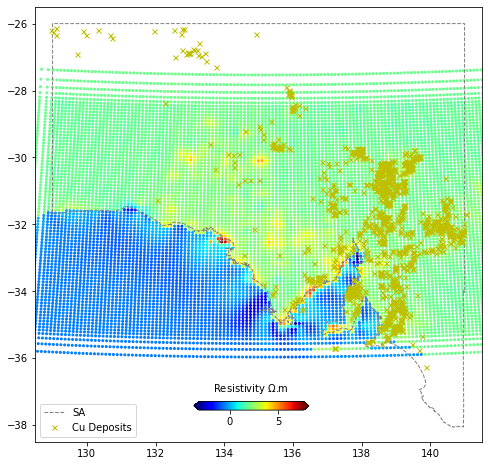

In [9]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes()
im=ax.scatter(data_res.lon,data_res.lat,s=4,c=data_res.resistivity,cmap="jet")
ax.plot(xval,yval,'grey',linestyle='--',linewidth=1,label='SA')
ax.plot(comm.LONGITUDE, comm.LATITUDE, marker='x', linestyle='',markersize=5, color='y',label=commname+" Deposits")

plt.xlim(128.5,141.5)
plt.ylim(-38.5,-25.5)
plt.legend(loc=3)

cbaxes = fig.add_axes([0.40, 0.18, 0.2, 0.015])
cbar = plt.colorbar(im, cax = cbaxes,orientation="horizontal",extend='both')
cbar.set_label('Resistivity $\Omega$.m', labelpad=10)
cbar.ax.xaxis.set_label_position('top')

plt.show()

### Faults and dykes vector polylines

In [10]:
# For dealing with arrays 
import numpy as np

In [11]:
#Get fault data neo
faultshape="data/Faults/Faults.shp"
shapeRead = shapefile.Reader(faultshape)
shapes  = shapeRead.shapes()
Nshp    = len(shapes)

faultsNeo=[]
for i in range(0,Nshp):
    for j in shapes[i].points:
        faultsNeo.append([j[0],j[1]])
faultsNeo=np.array(faultsNeo)
faultsNeo

array([[133.46269605, -27.41825034],
       [133.46770683, -27.42062991],
       [133.4723624 , -27.42259841],
       ...,
       [138.44613353, -35.36560605],
       [138.44160669, -35.36672662],
       [138.43805501, -35.36793484]])

This data is just a Lat-Lon location. Think how we can use this in a model.

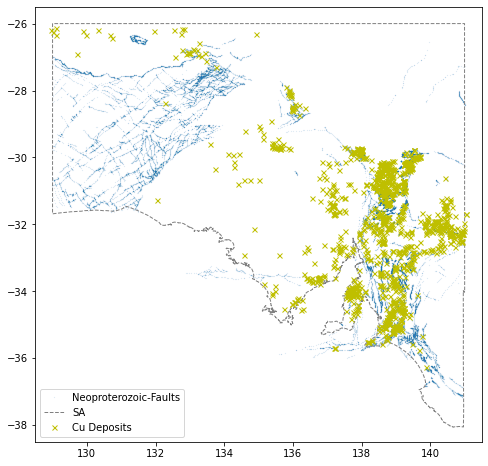

In [12]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes()
plt.plot(faultsNeo[:,0],faultsNeo[:,1],'.',markersize=0.1,label="Neoproterozoic-Faults")
ax.plot(xval,yval,'grey',linestyle='--',linewidth=1,label='SA')
ax.plot(comm.LONGITUDE, comm.LATITUDE, marker='x', linestyle='',markersize=5, color='y',label=commname+" Deposits")

plt.xlim(128.5,141.5)
plt.ylim(-38.5,-25.5)
plt.legend(loc=3)

plt.show()

### Netcdf formatted raster grids - geophysics

In [13]:
# For timing events
import time
# For making grids and reading netcdf data
import scipy
import scipy.io

In [14]:
#Define a function to read the netcdf files
def readnc(filename):
    tic=time.time()
    rasterfile=filename
    data = scipy.io.netcdf_file(rasterfile,'r',mmap=False)
    xdata=data.variables['lon'][:]
    ydata=data.variables['lat'][:]
    zdata=np.array(data.variables['Band1'][:])
    data.close()
    
    toc=time.time()
    print("Loaded", rasterfile, "in", f'{toc-tic:.2f}s')
    print("Spacing x", f'{xdata[2]-xdata[1]:.2f}', 
          "y", f'{ydata[2]-ydata[1]:.2f}', 
          "Shape:", np.shape(zdata), "Min x:", np.min(xdata), "Max x:", np.max(xdata),
          "Min y:", np.min(ydata), f'Max y {np.max(ydata):.2f}')

    return(xdata,ydata,zdata,np.min(xdata),np.min(ydata),xdata[2]-xdata[1],ydata[2]-ydata[1])

In [15]:
# Digital Elevation Model
x1,y1,z1,originx1,originy1,pixelx1,pixely1 = readnc("data/sa-dem.nc")
# Total Magnetic Intensity
x2,y2,z2,originx2,originy2,pixelx2,pixely2 = readnc("data/sa-mag-tmi.nc")
# Gravity
x3,y3,z3,originx3,originy3,pixelx3,pixely3 = readnc("data/sa-grav.nc")

Loaded data/sa-dem.nc in 0.01s
Spacing x 0.01 y 0.01 Shape: (1208, 1201) Min x: 129.005 Max x: 141.005 Min y: -38.065 Max y -25.99
Loaded data/sa-mag-tmi.nc in 0.01s
Spacing x 0.01 y 0.01 Shape: (1208, 1201) Min x: 129.005 Max x: 141.005 Min y: -38.065 Max y -25.99
Loaded data/sa-grav.nc in 0.01s
Spacing x 0.01 y 0.01 Shape: (1208, 1201) Min x: 129.005 Max x: 141.005 Min y: -38.065 Max y -25.99


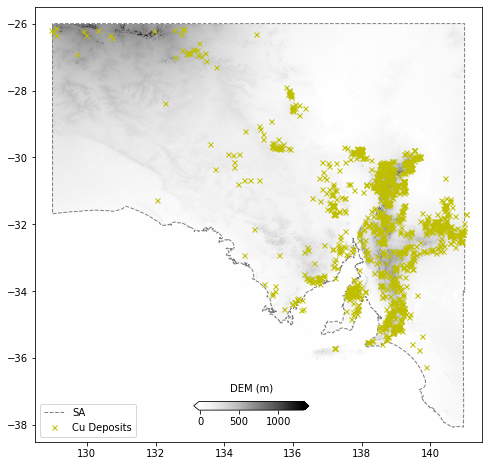

In [16]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes()
im=plt.pcolormesh(x1,y1,z1,cmap='Greys',shading='auto')
ax.plot(xval,yval,'grey',linestyle='--',linewidth=1,label='SA')
ax.plot(comm.LONGITUDE, comm.LATITUDE, marker='x', linestyle='',markersize=5, color='y',label=commname+" Deposits")

plt.xlim(128.5,141.5)
plt.ylim(-38.5,-25.5)
plt.legend(loc=3)

cbaxes = fig.add_axes([0.40, 0.18, 0.2, 0.015])
cbar = plt.colorbar(im, cax = cbaxes,orientation="horizontal",extend='both')
cbar.set_label('DEM (m)', labelpad=10)
cbar.ax.xaxis.set_label_position('top')

plt.show()

These data are raster grids. Essentially Lat-Lon-Value like the XYZ data, but represented in a different format.

### Categorical Geology in vector polygons

In [17]:
#Archean basement geology
geolshape=shapefile.Reader("data/Archaean_Early_Mesoprterzoic_polygons_shp/geology_archaean.shp")

recsArch   = geolshape.records()
shapesArch  = geolshape.shapes()

In [18]:
# Print the field names in the shapefile
for i,field in enumerate(geolshape.fields):
    print(i-1,field[0]) 

-1 DeletionFlag
0 MAJORSTRAT
1 SG_DESCRIP
2 MAPUNIT
3 SG_PROVINC
4 DOMAIN
5 AGE
6 SEQUSET
7 PRIMARYAGE
8 OROGENYAGE
9 INHERITAGE
10 STRATNO
11 STRATNAME
12 STRATDESC
13 GISCODE
14 SUBDIVNAME
15 SUBDIVSYMB
16 PROVINCE
17 MAXAGE
18 MAXMOD
19 MAXMETH
20 MINAGE
21 MINMOD
22 MINMETH
23 GLCODE


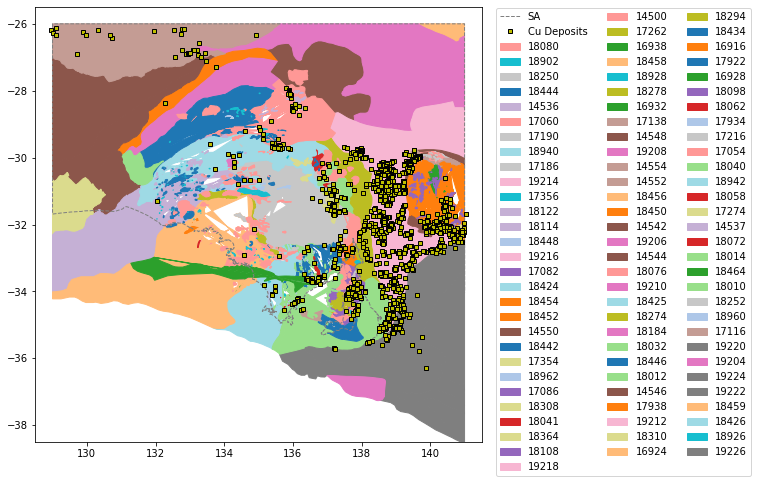

In [19]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes()

#index of the geology unit 
geoindex = 23
#Gather all the unique Major Geology unit numbers
labs=[]
for i in recsArch:
    labs.append(i[geoindex])

geols = list(set(labs))

# Create a unique color for each geological unit label
color = plt.cm.tab20(np.linspace(0, 1, len(geols)))
cdict={}
for i, geol in enumerate(geols):
    cdict.update({geol:color[i]})
    
#Plot each of the geology polygons
legend1=[]
for i in range(len(shapesArch)):
    boundary = shapesArch[i].points
    xs = [x for x, y in shapesArch[i].points]
    ys = [y for x, y in shapesArch[i].points]
    c = cdict[recsArch[i][geoindex]]
    l1 = ax.fill(xs,ys,c=c,label=recsArch[i][geoindex])
    legend1.append(l1)
      
#Plot the extra stuff
l2 = ax.plot(xval,yval,'grey',linestyle='--',linewidth=1,label='SA')
l3 = ax.plot(comm.LONGITUDE, comm.LATITUDE, 
        marker='s', markeredgecolor='k', linestyle='',markersize=4, color='y',
        label=commname+" Deposits")

#Todo: Split the legends
#ax.legend([l2,l3],['SA',commname+" Deposits"],loc=3)

#Legend without duplicate values
handles, labels = ax.get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
ax.legend(*zip(*unique), bbox_to_anchor = (1.02, 1.01), ncol=3)

plt.xlim(128.5,141.5)
plt.ylim(-38.5,-25.5)
#plt.legend(loc=3) #bbox_to_anchor = (1.05, 0.6))

plt.show()

**Take a moment to appreciate the various methods you have used just to load the data!**

Now we need to think about what we actually want to achieve? What is our goal here? This will determine what kind of data analysis/manipulation we need to make here. Consider the flow diagram for [choosing the right machine learning method](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

## Step 3 - Assign geophys values to target locations

We need to assign the values of each of these geophyiscal datasets (predictor variables) to the target class (i.e. mineral deposit locations). 
The assumption being that the occurnece of some mineral deposit (e.g. Cu) is a function of x1, x2, x3, x4, x5, x6. 
Where the Resitivity is x1, the distance to a Neoprotezoic fault is x2, the value of DEM, magnetic TMI, and Gravity is x3, x4, and x5, and the geologica basement unit is x6.

In [20]:
# Make a Target DataFrame of the points we want to interrogate the features for
td = comm[['LONGITUDE', 'LATITUDE']].copy()

### Resistivity

In [21]:
# For making KD Trees
import scipy.spatial

In [22]:
# Define a function which "coregisters" a point from a bunch of other points.
def coregPoint(tree,point,region,retval='index'):
    '''
    Finds the nearest neighbour to a point from a bunch of other points
    tree - a scipy CKTree to search for the point over
    point - array([longitude,latitude])
    region - integer, same units as data
    '''
    dists, indexes = tree.query(point,k=1,distance_upper_bound=region) 

    if retval=='index':
        return (indexes)
    elif retval=='dists':
        return(dists)
    

In [62]:
# Find the values of the resetivity grid for each lat/lon deposit location.

# Make a search-tree of the point-pairs for fast lookup of nearest matches
treeres = scipy.spatial.cKDTree(np.c_[data_res.lon,data_res.lat])

# Perform the search for each point
indexes = td.apply(
    lambda x: coregPoint(treeres,np.array([x.LONGITUDE, x.LATITUDE]),10,retval='index'), axis=1)

In [24]:
td['res'] = data_res.loc[indexes].resistivity.values
td

,LONGITUDE,LATITUDE,res
0,129.106649,-26.135900,1.9959
1,132.781571,-26.151144,2.0450
2,132.816676,-26.159202,2.0450
3,128.945869,-26.179362,1.9978
4,132.549807,-26.185500,2.0694
...,...,...,...
1564,138.910941,-35.212862,2.4313
1565,138.919616,-35.251686,2.3233
1566,138.673907,-35.301507,2.2986
1567,139.762176,-35.345652,2.0219


### Faults

In [25]:
#Same for the fault data 
# but this time we get the "distance to the point", rather than the value at that point.
treefaults = scipy.spatial.cKDTree(faultsNeo)

dists = td.apply(
    lambda x: coregPoint(treefaults,np.array([x.LONGITUDE, x.LATITUDE]),100,retval='dists'), axis=1)

In [26]:
td['faults'] = dists
td

,LONGITUDE,LATITUDE,res,faults
0,129.106649,-26.135900,1.9959,0.858696
1,132.781571,-26.151144,2.0450,0.607134
2,132.816676,-26.159202,2.0450,0.577540
3,128.945869,-26.179362,1.9978,0.810394
4,132.549807,-26.185500,2.0694,0.652131
...,...,...,...,...
1564,138.910941,-35.212862,2.4313,0.009013
1565,138.919616,-35.251686,2.3233,0.024538
1566,138.673907,-35.301507,2.2986,0.027873
1567,139.762176,-35.345652,2.0219,0.024593


### Geophysics

In [27]:
# Define a function which "coregisters" a point within a raster.
def get_coords_at_point(originx,originy,pixelx,pixely,lon,lat):
    '''
    Given a point in some coordinate reference (e.g. lat/lon)
    Find the closest point to that in an array (e.g. a raster)
    and return the index location of that point in the raster.
    INPUTS
        "output from "gdal_data.GetGeoTransform()"
    originx: first point in first axis
    originy: first point in second axis
    pixelx: difference between x points
    pixely: difference between y points
    
    lon: x/row-coordinate of interest
    lat: y/column-coordinate of interest
    
    RETURNS
    col: x index value from the raster
    row: y index value from the raster
    '''
    row = int((lon - originx)/pixelx)
    col = int((lat - originy)/pixely)

    return (col, row)


# Pass entire array of latlon and raster info to us in get_coords_at_point
def rastersearch(latlon,raster,originx,originy,pixelx,pixely):
    zlist=[]
    for lon,lat in zip(latlon.LONGITUDE,latlon.LATITUDE):
        try:
            zlist.append(raster[get_coords_at_point(originx,originy,pixelx,pixely,lon,lat)])
        except:
            zlist.append(np.nan)
            
    return(zlist)

In [28]:
td['dem'] = rastersearch(td,z1,originx1,originy1,pixelx1,pixely1)
td['mag'] = rastersearch(td,z2,originx2,originy2,pixelx2,pixely2)
td['grav'] = rastersearch(td,z3,originx3,originy3,pixelx3,pixely3)

In [29]:
td

,LONGITUDE,LATITUDE,res,faults,dem,mag,grav
0,129.106649,-26.135900,1.9959,0.858696,635.556335,-395.009888,27.653816
1,132.781571,-26.151144,2.0450,0.607134,540.414062,-327.329987,-83.830025
2,132.816676,-26.159202,2.0450,0.577540,532.723755,-51.946140,-78.316444
3,128.945869,-26.179362,1.9978,0.810394,99.930511,1.357960,-26.815083
4,132.549807,-26.185500,2.0694,0.652131,610.149902,-93.218666,-86.025749
...,...,...,...,...,...,...,...
1564,138.910941,-35.212862,2.4313,0.009013,112.044182,-231.762283,-6.686998
1565,138.919616,-35.251686,2.3233,0.024538,57.948841,-302.786255,-7.401310
1566,138.673907,-35.301507,2.2986,0.027873,220.003403,228.412949,5.332988
1567,139.762176,-35.345652,2.0219,0.024593,19.890858,-91.274986,15.448737


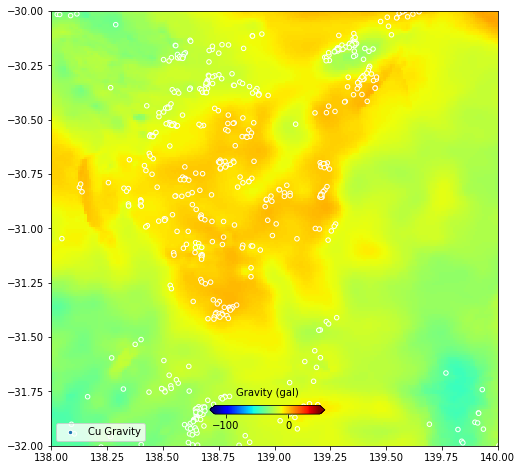

In [30]:
# Check we got it right.
# Plot a grid, and our interrogated points

fig = plt.figure(figsize=(8,8))
ax = plt.axes()
im=plt.pcolormesh(x3,y3,z3,cmap='jet',shading='auto',vmin=min(td.grav),vmax=max(td.grav))
#ax.plot(xval,yval,'grey',linestyle='--',linewidth=1,label='SA')
#ax.plot(comm.LONGITUDE, comm.LATITUDE, marker='o', linestyle='',markersize=5, color='y',label=commname+" Deposits")

ax.scatter(td.LONGITUDE, td.LATITUDE, s=20, c=td.grav,
           label=commname+" Gravity",cmap='jet',vmin=min(td.grav),vmax=max(td.grav),edgecolors='white')

plt.xlim(138,140)
plt.ylim(-32,-30)
plt.legend(loc=3)

cbaxes = fig.add_axes([0.40, 0.18, 0.2, 0.015])
cbar = plt.colorbar(im, cax = cbaxes,orientation="horizontal",extend='both')
cbar.set_label('Gravity (gal)', labelpad=10)
cbar.ax.xaxis.set_label_position('top')

plt.show()

### Geology

In [31]:
# For dealing with shapefile components
from shapely.geometry import Point
from shapely.geometry import shape

#Define a function to find what polygon a point lives inside (speed imporivements can be made here)
def shapeExplore(lon,lat,shapes,recs,record):
    #'record' is the column index you want returned
    for i in range(len(shapes)):
        boundary = shapes[i]
        if Point((lon,lat)).within(shape(boundary)):
            return(recs[i][record])
    #if you have been through the loop with no result
    return(-9999.)

In [32]:
%%time
geoindex = 23
td['geol']=td.apply(lambda x: shapeExplore(x.LONGITUDE, x.LATITUDE, shapesArch,recsArch,geoindex), axis=1)

Wall time: 3min 43s


In [33]:
td

,LONGITUDE,LATITUDE,res,faults,dem,mag,grav,geol
0,129.106649,-26.135900,1.9959,0.858696,635.556335,-395.009888,27.653816,14552.0
1,132.781571,-26.151144,2.0450,0.607134,540.414062,-327.329987,-83.830025,14552.0
2,132.816676,-26.159202,2.0450,0.577540,532.723755,-51.946140,-78.316444,14552.0
3,128.945869,-26.179362,1.9978,0.810394,99.930511,1.357960,-26.815083,-9999.0
4,132.549807,-26.185500,2.0694,0.652131,610.149902,-93.218666,-86.025749,14552.0
...,...,...,...,...,...,...,...,...
1564,138.910941,-35.212862,2.4313,0.009013,112.044182,-231.762283,-6.686998,19226.0
1565,138.919616,-35.251686,2.3233,0.024538,57.948841,-302.786255,-7.401310,19220.0
1566,138.673907,-35.301507,2.2986,0.027873,220.003403,228.412949,5.332988,18010.0
1567,139.762176,-35.345652,2.0219,0.024593,19.890858,-91.274986,15.448737,19220.0


**Congrats, you now have an ML dataset ready to go!**

Almost... but what is the target? Let's make a binary classifier.

## Step 4 - Generate a "non-deposit" dataset
We have a set of locations where a certain mineral deposit occurs along with the values of various geophysical parameters at those locations. To identify what values of the geophysics are associated with a mineral deposit then we need a representation of the "background noise" of those parameters, i.e. what the values are when there is no mineral deposit.

This step is important. There are numerous ways to generate our non-deposit set, each with different benefits and trade-offs. The randomisation of points throughout *some* domain appears to be robust. But you must think, is this domain a reasonable estimation of "background" geophysics/geology? Why are you picking these locations as non-deposits? Will they be over/under-representing actual deposits? Will they be over/under-representing actual non-deposits?

In [34]:
#Now make a set of "non-deposits" using a random location within our exploration area
lats_rand=np.random.uniform(low=min(df.LATITUDE), high=max(df.LATITUDE), size=len(comm.LATITUDE))
lons_rand=np.random.uniform(low=min(df.LONGITUDE), high=max(df.LONGITUDE), size=len(comm.LONGITUDE))

print("Produced", len(lats_rand),len(lons_rand), "latitude-longitude pairs for non-deposits.")

Produced 1569 1569 latitude-longitude pairs for non-deposits.


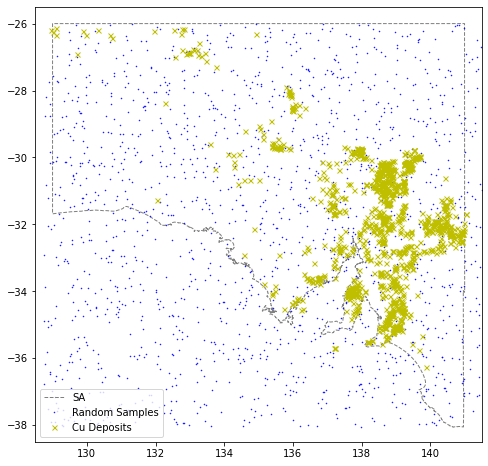

In [78]:
# Where are these randomised "non deposits"
fig = plt.figure(figsize=(8,8))
ax = plt.axes()

ax.plot(xval,yval,'grey',linestyle='--',linewidth=1,label='SA')

ax.plot(lons_rand, lats_rand, 
        marker='.', linestyle='',markersize=1, color='b',label="Random Samples")

ax.plot(td.LONGITUDE, td.LATITUDE, 
        marker='x', linestyle='',markersize=5, color='y',label=commname+" Deposits")

plt.xlim(128.5,141.5)
plt.ylim(-38.5,-25.5)
plt.legend(loc=3)

plt.show()

We must do the same coregistration/interrogation of the different data layers for our randomised "non-deposit" data.

In [35]:
%%time

td2 = pd.DataFrame({'LONGITUDE': lons_rand, 'LATITUDE': lats_rand})
                   
# Res
indexes = td2.apply(
    lambda x: coregPoint(treeres,np.array([x.LONGITUDE, x.LATITUDE]),10,retval='index'), axis=1)
    
td2['res'] = data_res.loc[indexes].resistivity.values

# Faults
td2['faults'] = td2.apply(
    lambda x: coregPoint(treefaults,np.array([x.LONGITUDE, x.LATITUDE]),100,retval='dists'), axis=1)

# Geophys
td2['dem'] = rastersearch(td2,z1,originx1,originy1,pixelx1,pixely1)
td2['mag'] = rastersearch(td2,z2,originx2,originy2,pixelx2,pixely2)
td2['grav'] = rastersearch(td2,z3,originx3,originy3,pixelx3,pixely3)

#Geology
td2['geol']=td2.apply(lambda x: shapeExplore(x.LONGITUDE, x.LATITUDE, shapesArch,recsArch,-1), axis=1)

Wall time: 6min 15s


In [ ]:
#Add flag indicating classification label
td['deposit']=1
td2['deposit']=0

In [79]:
fv = pd.concat([td,td2],axis=0,ignore_index=True)
fv

,LONGITUDE,LATITUDE,res,faults,dem,mag,grav,geol,deposit
0,129.106649,-26.135900,1.9959,0.858696,635.556335,-395.009888,27.653816,14552.0,1
1,132.781571,-26.151144,2.0450,0.607134,540.414062,-327.329987,-83.830025,14552.0,1
2,132.816676,-26.159202,2.0450,0.577540,532.723755,-51.946140,-78.316444,14552.0,1
3,128.945869,-26.179362,1.9978,0.810394,99.930511,1.357960,-26.815083,-9999.0,1
4,132.549807,-26.185500,2.0694,0.652131,610.149902,-93.218666,-86.025749,14552.0,1
...,...,...,...,...,...,...,...,...,...
3133,133.712523,-27.430556,1.9932,0.034172,299.461853,306.055725,-28.421995,18450.0,0
3134,140.889270,-36.470372,2.0203,0.301697,100.141029,258.747925,-10.375274,19222.0,0
3135,130.696744,-29.254114,1.9361,0.138681,230.664276,333.649780,-55.481823,14544.0,0
3136,130.885614,-33.879420,-0.5771,2.035296,0.000000,0.000000,0.000000,18459.0,0


# Explatory Data Analysis

This is often the point you recieve the data in (if you are using any well-formed datasets). But in reality 90% of the time is doing weird data wrangling steps like what we have done. Then 9% is spent exploring your dataset and understanding it more, dealing with missing data, observing correlations. This is often an iterative process. Let's do some simple visualisations.

Note: the last 1% of time is actually applying the ML algorithms!

In [37]:
# For nice easy data vis plots
import seaborn as sns

c:\users\nbutter\miniconda3\envs\geopy\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


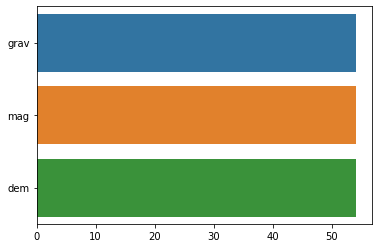

In [70]:
missingNo = fv.isnull().sum(axis = 0).sort_values(ascending = False)
missingNo = missingNo[missingNo.values  > 0]
missingNo

sns.barplot(missingNo.values, missingNo.index);

In [72]:
import upsetplot

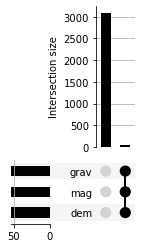

In [73]:
missing_cols = missingNo.index[:5].tolist()
missing_counts = (fv.loc[:, missing_cols]
                  .isnull()
                  .groupby(missing_cols)
                  .size())

upsetplot.plot(missing_counts);

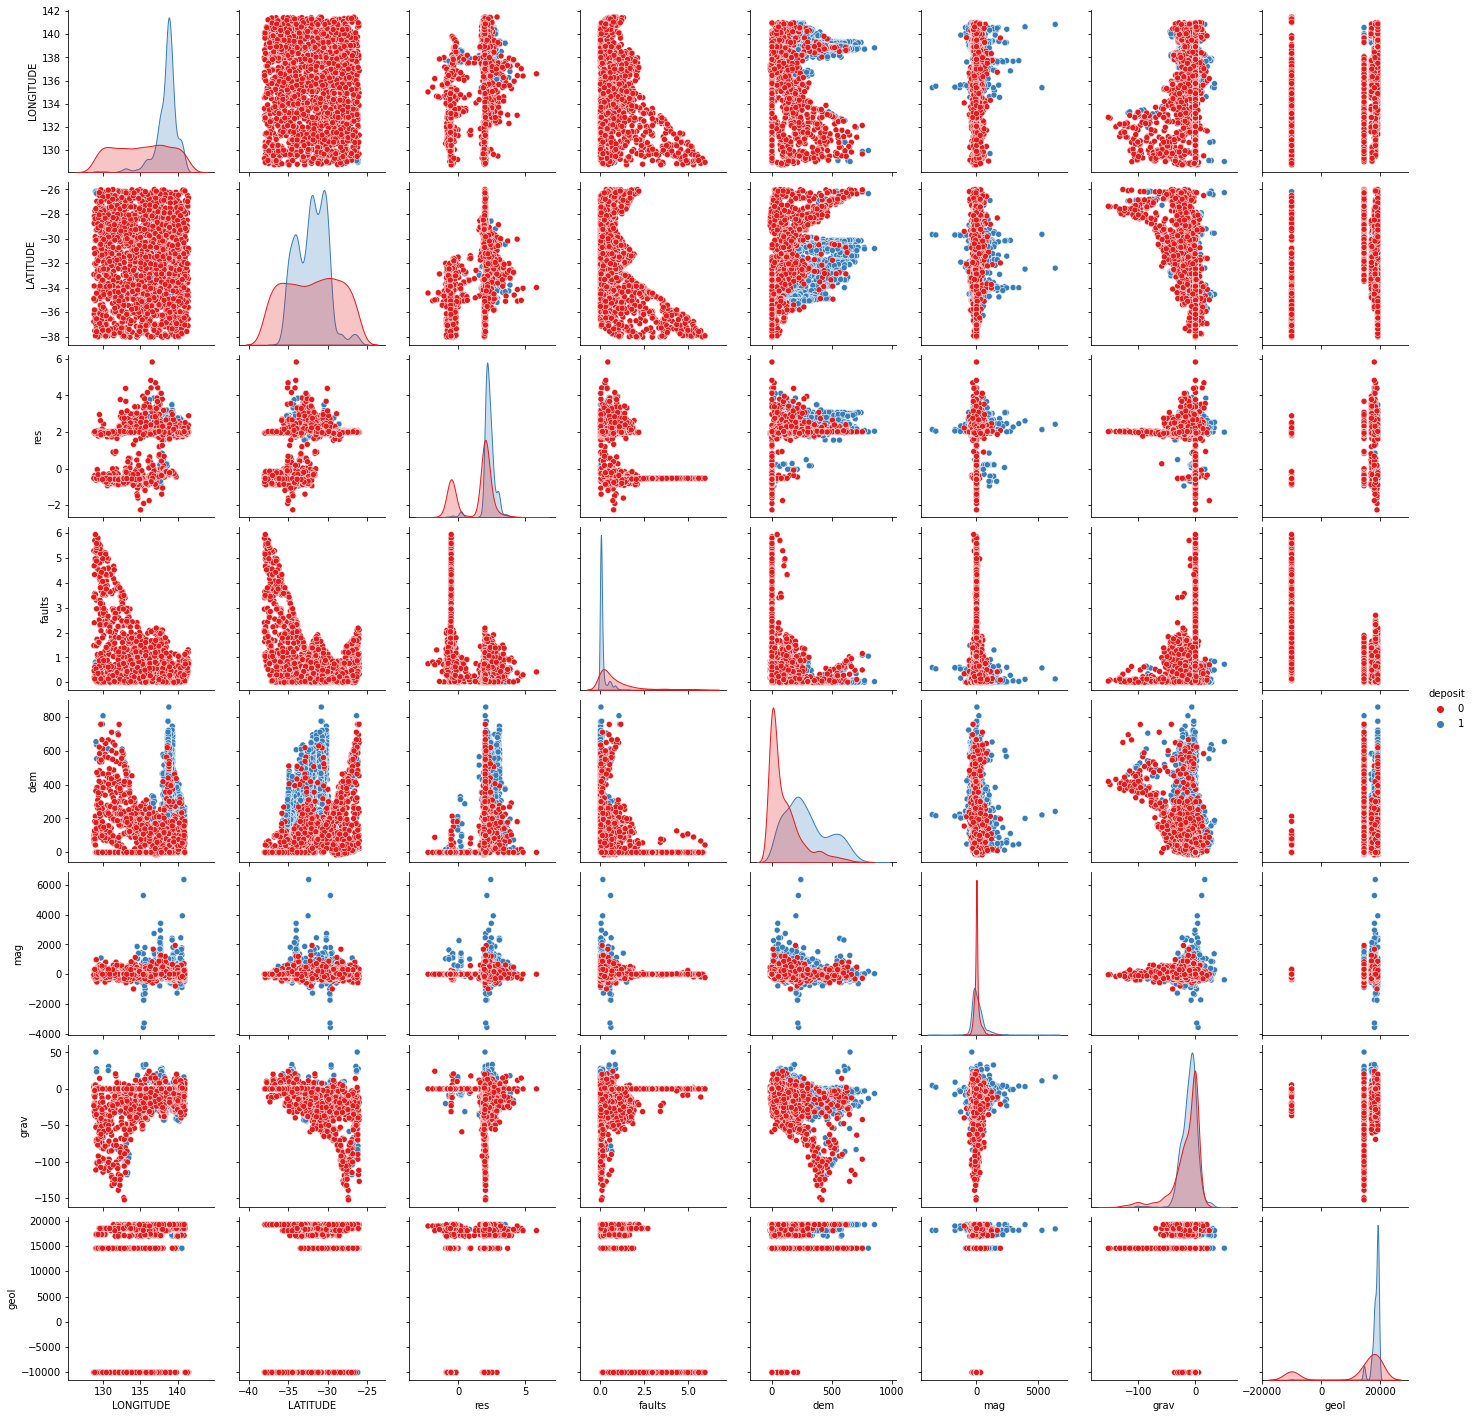

In [68]:
# Plot historgrams and scatter plots for each combination of features.
sns.pairplot(fv,hue='deposit',palette="Set1",diag_kind="auto")

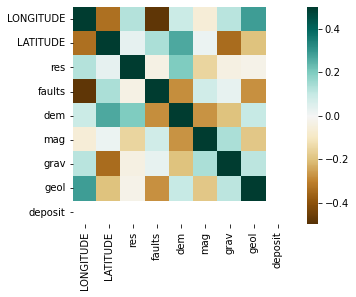

In [69]:
#Plot a heatmap for how correlated each of the features are
corr = td.corr() 

sns.heatmap(corr,
            cmap=plt.cm.BrBG, 
            vmin=-0.5, vmax=0.5, 
            square=True,
            xticklabels=True, yticklabels=True,
            );

# Machine Learning

We now have a clean dataset, we know a bit about, let's try and measure some inferences.

### ML Classification
This is where the ML classifier is defined. We can substitue our favourite ML technique here, and tune model variables as desired. The default choices are recommended for the Gawler region.

In [100]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

In [98]:
features.columns

Index(['res', 'faults', 'dem', 'mag', 'grav', 'geol'], dtype='object')

In [101]:
#Create the 'feature vector' and a 'target classification vector'
features=fv.iloc[:,2:-1]
targets=fv.deposit

#Create the ML classifier with numerical and categorical data
#Scale, and replace missing values
numeric_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(missing_values=-9999., strategy='median')),
    ('scaler', StandardScaler())])

#Encode categorical data and fill missing values with default 0
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

#Combine numerical and categorical data
preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, ['res', 'faults', 'dem', 'mag', 'grav']),
        ('cat', categorical_transformer, ['geol'])])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
rf = Pipeline(steps=[('preprocessor', preprocessor),
                ('classifier', RandomForestClassifier(random_state=1))])


In [103]:
print('Tranining the Clasifier...')
rf.fit(features,targets)

print("Done RF. Now scoring...")
scores = cross_val_score(rf, features,targets, cv=10)

print("RF 10-fold cross validation Scores:", scores)
print("SCORE Mean: %.2f" % np.mean(scores), "STD: %.2f" % np.std(scores), "\n")

plt.plot(targets.values,'b-',label='Target (expected)')
plt.plot(rf.predict(features),'rx',label='Prediction')
plt.xlabel("Feature set")
plt.ylabel("Target/Prediction")
plt.legend(loc=7)

Tranining the Clasifier...


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [37]:
#Make a plot out the feature scores. 
#These are the important parameters that are correlated with the deposits.

ft_idx=[]
ft_lab=[]
all_idx=[]
all_lab=[]
all_dat=[]
#Just print the significant features above some threshold
for i,lab in enumerate(np.append(numerical_features,rf['preprocessor'].transformers_[1][1]['onehot'].get_feature_names(categorical_features))):
    all_dat.append([i,lab,rf.steps[1][1].feature_importances_[i]])
    all_lab.append(lab)
    all_idx.append(i)
    if rf.steps[1][1].feature_importances_[i] >1*np.median(rf.steps[1][1].feature_importances_): 
        ft_idx.append(i)
        ft_lab.append(lab)
        

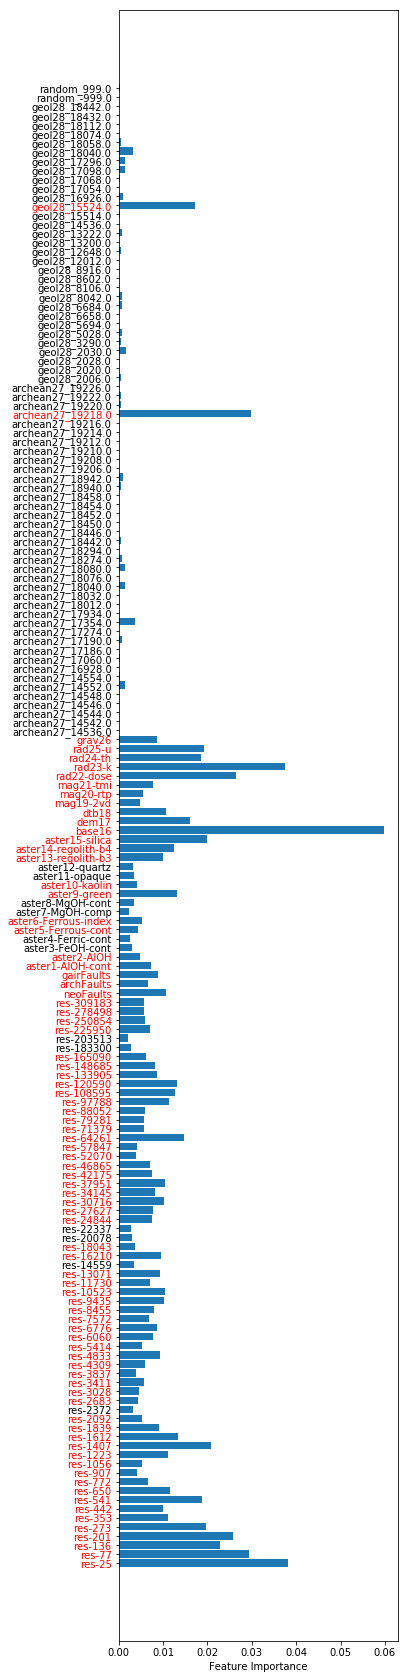

In [38]:
#And plot all the feature importances
#plt.plot(rf.steps[1][1].feature_importances_)

fig, ax = plt.subplots(figsize=(5,30))

ft_imps=rf.steps[1][1].feature_importances_
y_pos=np.arange(len(ft_imps))
ax.barh(y_pos,ft_imps,align='center')

ax.set_yticks(all_idx)
ax.set_yticklabels(all_lab)
ax.yaxis.label.set_color('red')
for i in ft_idx:
    ax.get_yticklabels()[i].set_color("red")

ax.set_xlabel('Feature Importance')

plt.show()

#plt.xticks([0,1,2,3,4,5,7,81,82,83,84,85,86])

RF...
Done RF


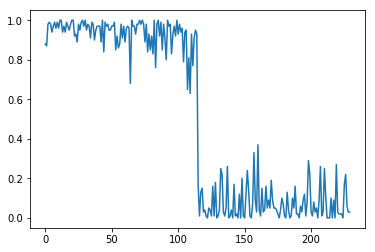

In [39]:
#Chec the probabilities at each of the deposit/non-deposit points
print('RF...')
pRF=np.array(rf.predict_proba(features))
print("Done RF")

plt.plot(pRF[:,1])

## Finally, apply the model to the grid

In [40]:
#Apply the trained ML to our gridded data to determine the probabilities at each of the points
print('RF...')
pRF_map=np.array(rf.predict_proba(target_data[numerical_features+categorical_features]))
print("Done RF")

RF...
Done RF


In [41]:
#Create a meshgrid from our xyz list of points
gridX,gridY,gridZ=grid(target_data.lon, target_data.lat,pRF_map[:,1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:67: MatplotlibDeprecationWarning: The griddata function was deprecated in Matplotlib 2.2 and will be removed in 3.1. Use scipy.interpolate.griddata instead.


In [310]:
#Save the csv grid of targets
targetCu = {'Longitude': target_data.lon, 'Latitude': target_data.lat, 'Prediction': pRF_map[:,1]}
targetCu=pd.DataFrame(targetCu)
targetCu.to_csv('Targets-'+commname+'.csv',header=0,index=False)

<urlopen error [Errno -5] No address associated with hostname>
<urlopen error [Errno -5] No address associated with hostname><urlopen error [Errno -5] No address associated with hostname>
<urlopen error [Errno -5] No address associated with hostname>
<urlopen error [Errno -5] No address associated with hostname>
<urlopen error [Errno -5] No address associated with hostname>



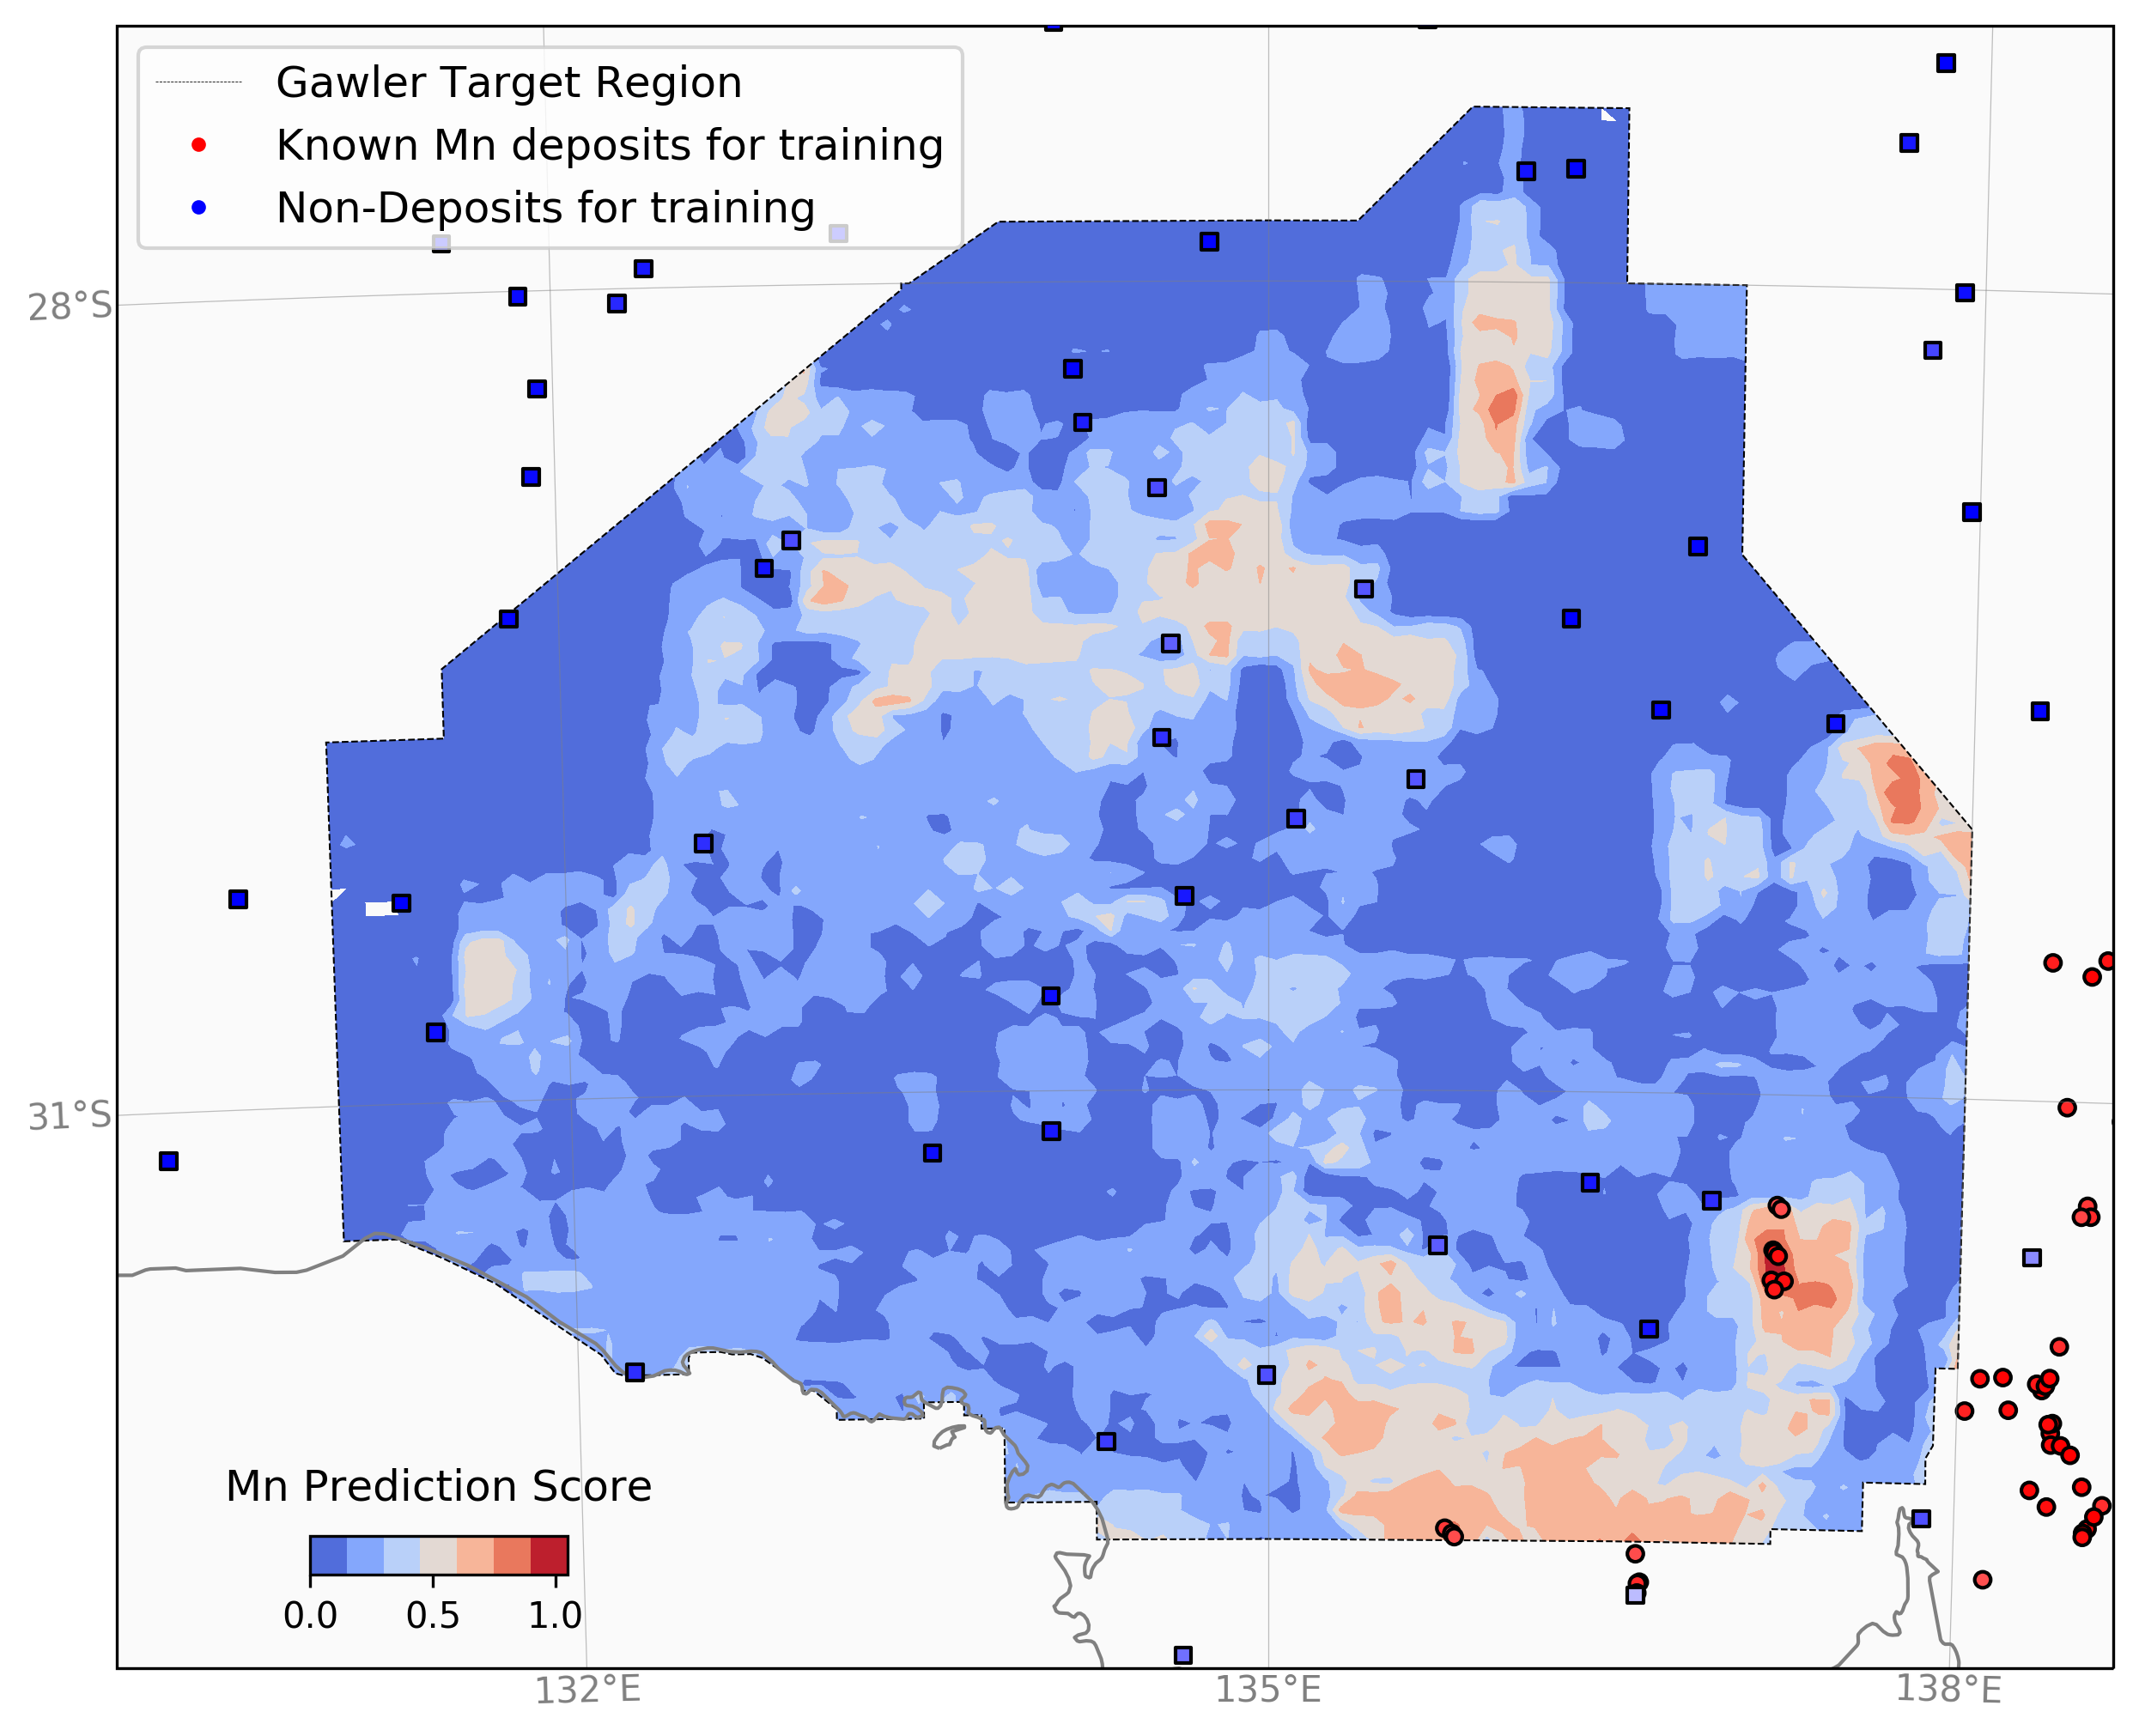

In [42]:
#Plot the final target map
fig = plt.figure(figsize=(10,10),dpi=300)

#Make a map projection to plot on.
ax = plt.axes(projection=ccrs.LambertAzimuthalEqualArea(central_longitude=135.0, central_latitude=-31.0))
       
#Set the extent of interest
img_extent = [min(df.LONGITUDE)+1.5,  max(df.LONGITUDE)-3.0, min(df.LATITUDE)+5,max(df.LATITUDE)-1]
ax.set_extent(img_extent)

#Put down a base map
ax.coastlines(resolution='10m', color='gray',)
tiler = Stamen('terrain-background')
mercator = tiler.crs
ax.add_image(tiler, 6)

#Make the gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.3, color='gray', alpha=0.5, linestyle='-')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = True
#gl.xlines = False
gl.xlocator = mticker.FixedLocator(list(np.linspace(np.floor(min(df.LONGITUDE))+1,np.ceil(max(df.LONGITUDE))-1,num=5)))
gl.ylocator = mticker.FixedLocator(list(np.linspace(np.floor(min(df.LATITUDE))+1,np.ceil(max(df.LATITUDE))-1,num=5)))
gl.xlocator = mticker.FixedLocator([141,138,135,132,129])
gl.ylocator = mticker.FixedLocator([-38,-34,-31,-28,-26])
#gl.ylocator = mticker.FixedLocator(list(np.linspace(-28,-35,num=3)))
gl.xlabel_style = {'size': 10, 'color': 'gray'}
gl.ylabel_style = {'size': 10, 'color': 'gray'}
#gl.xlabel_style = {'color': 'red', 'weight': 'bold'}
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

#Create a patch of the gawler region where the data is
path=Path(list(zip(xval, yval)))
patch = PathPatch(path, facecolor='none',transform = ccrs.PlateCarree(),linestyle='--',linewidth=0.5)
plt.gca().add_patch(patch)

#Plot the main map
im=ax.contourf(gridX,gridY,gridZ,cmap=plt.cm.coolwarm,transform = ccrs.PlateCarree(),vmin=0,vmax=1)
#im = ax.imshow(gridZ, interpolation='bicubic', cmap=plt.cm.bwr,
#                origin='lower', extent=[np.min(gridX),np.max(gridX),np.min(gridY),np.max(gridY)],
#                clip_path=patch, clip_on=True,zorder=1,transform = ccrs.PlateCarree())
for c in im.collections:
    c.set_clip_path(patch)
    
# l5=ax.scatter(commall.LONGITUDE, commall.LATITUDE, 
#               edgecolor='k',s=10,marker='d', linewidths=0.5,label="",
#               c='r',cmap=plt.cm.bwr,vmin=0,vmax=1,zorder=2,transform = ccrs.PlateCarree())

#Add the deposits coloured by their classification score
l4=ax.scatter(training_data.lon[training_data.deposit==0], training_data.lat[training_data.deposit==0],
               edgecolor='k',s=20,marker='s', linewidths=1,label="",
               c=pRF[lendep:,1],cmap=plt.cm.bwr,vmin=0,vmax=1,zorder=3,transform = ccrs.PlateCarree())

l3=ax.scatter(training_data.lon[training_data.deposit==1], training_data.lat[training_data.deposit==1], 
              edgecolor='k',s=20,marker='o', linewidths=1,label="",
              c=pRF[:lendep,1],cmap=plt.cm.bwr,vmin=0,vmax=1,zorder=2,transform = ccrs.PlateCarree())

#Plot the outline of the Gawler region
ax.plot(xval,yval,'k--',label='Gawler Target Region',linewidth=0.2)
ax.plot(0,0,'r.',label='Known '+commname+' deposits for training',zorder=3,transform = ccrs.PlateCarree())
ax.plot(0,0,'b.',label='Non-Deposits for training',zorder=3,transform = ccrs.PlateCarree())
#ax.plot(0,0,'rd',label='All other Au deposits (not used for training)',zorder=3,transform = ccrs.PlateCarree())

# ax.plot(xlons,xlats,'y-',label='Central Gawler Au Province',zorder=3,transform = ccrs.PlateCarree())
# ax.plot(xlons2,xlats2,'g-',label='Olympic IOCG Province',zorder=3,transform = ccrs.PlateCarree())

# ax.plot(xval,yval,'k--',label='Gawler Target Region',linewidth=0.5,zorder=2,transform = ccrs.PlateCarree())

# Add a map title, legend, colorbar
#plt.title('Known deposits and predictive map for Gawler region, SA')
ax.legend(loc=2,fontsize=12)
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')

#Make a Colorbar
# cbaxes = fig.add_axes([0.16, 0.27, 0.25, 0.015])
# cbar = plt.colorbar(l3, cax = cbaxes,orientation="horizontal")
# cbar.set_label(commname+' prediction')

cbaxes = fig.add_axes([0.20, 0.22, 0.1, 0.015])
cbar = plt.colorbar(im, cax = cbaxes,orientation="horizontal", ticks=[0.0,0.5,1])
# # #cbar.ax.set_xticklabels(['Medium','High'],fontsize=8)
cbar.set_label(commname+' Prediction Score', labelpad=10,fontsize=12)
cbar.ax.xaxis.set_label_position('top')

plt.show()

In [ ]:
# Import numpy for array processing
import numpy as np

df['SIZE_VAL_cat']=df.SIZE_VAL.astype('category').cat.codes
# print(df.SIZE_VAL.astype('category').cat.categories)
df.SIZE_VAL_cat.plot.hist()

# Lets categorise each of the mineral occurences. We can use these as our targets
df['SIZE_VAL_cat'] = np.where(df['SIZE_VAL']=='', 0, df['SIZE_VAL_cat'])
df['SIZE_VAL_cat'] = np.where(df['SIZE_VAL']=='Low Significance', 0, df['SIZE_VAL_cat'])
df['SIZE_VAL_cat'] = np.where(df['SIZE_VAL']=='Locally Significant', 1, df['SIZE_VAL_cat'])
df['SIZE_VAL_cat'] = np.where(df['SIZE_VAL']=='Significant to Australia', 1, df['SIZE_VAL_cat'])
df['SIZE_VAL_cat'] = np.where(df['SIZE_VAL']=='Significant to SA', 1, df['SIZE_VAL_cat'])
df['SIZE_VAL_cat'] = np.where(df['SIZE_VAL']=='World-wide Significance', 1, df['SIZE_VAL_cat'])


import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
ax = plt.axes()
im=ax.scatter(df.LONGITUDE,df.LATITUDE,s=5+df.SIZE_VAL_cat.astype(float)*5,c=df.SIZE_VAL_cat,cmap='bwr')
ax.plot(xval,yval,'grey',linestyle='--',linewidth=1,label='SA')
#ax.plot(comm.LONGITUDE, comm.LATITUDE, marker='o', linestyle='',markersize=5, color='y',label=commname+" Deposits")

plt.xlim(128.5,141.5)
plt.ylim(-38.5,-25.5)
plt.legend(loc=3)

cbaxes = fig.add_axes([0.40, 0.18, 0.2, 0.015])
cbar = plt.colorbar(im, cax = cbaxes,orientation="horizontal",extend='neither')
cbar.set_label('Mines and Minerals Significance', labelpad=10)
cbar.ax.xaxis.set_label_position('top')
cbar.ax.set_xticklabels(['Low','','High'],fontsize=8)

plt.show()